In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


x_train shape: (60000, 28, 28) y_train shape: (60000,)
60000 train set
10000 test set
y = 2 Pullover


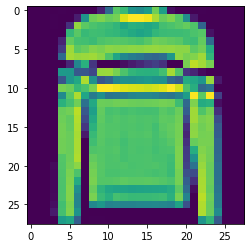

In [2]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training and test datasets
print(x_train.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 5
# y_train contains the lables, ranging from 0 to 9
label_index = y_train[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train[img_index])

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 60000
Number of test data - 10000


In [5]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Print the number of training, validation, and test datasets
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (55000, 28, 28, 1) y_train shape: (55000, 10)
55000 train set
5000 validation set
10000 test set


In [13]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               803072    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)              

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint
print('Model 1 \n')
total_acc = 0
for i in range(10):
    print("Run: " + str(i + 1))
    
    model = tf.keras.Sequential()

    # Must define the input shape in the first layer of the neural network
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    
    checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
    model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

    # Load the weights with the best validation accuracy
    model.load_weights('model.weights.best.hdf5')

    # Evaluate the model on test set
    score = model.evaluate(x_test, y_test, verbose=0)

    # Print test accuracy
    print('\n', 'Test accuracy:', score[1])
    total_acc += score[1]
    print('\n')
print('\n')
print("Average Model 1 Accuracy: " + str(total_acc / 10.0))

Model 1 

Run: 1
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54912/55000 [============================>.] - ETA: 0s - loss: 0.4639 - accuracy: 0.8332
Epoch 00001: val_loss improved from inf to 0.32213, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 23s 411us/sample - loss: 0.4637 - accuracy: 0.8333 - val_loss: 0.3221 - val_accuracy: 0.8880
Epoch 2/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.3055 - accuracy: 0.8896
Epoch 00002: val_loss improved from 0.32213 to 0.26652, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 21s 386us/sample - loss: 0.3055 - accuracy: 0.8896 - val_loss: 0.2665 - val_accuracy: 0.9068
Epoch 3/10
54848/55000 [============================>.] - ETA: 0s - loss: 0.2643 - accuracy: 0.9027
Epoch 00003: val_loss improved from 0.26652 to 0.24552, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 21s 382us/sample - loss

Epoch 6/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.1917 - accuracy: 0.9272
Epoch 00006: val_loss improved from 0.21640 to 0.20735, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 22s 399us/sample - loss: 0.1917 - accuracy: 0.9272 - val_loss: 0.2074 - val_accuracy: 0.9244
Epoch 7/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.1720 - accuracy: 0.9357
Epoch 00007: val_loss improved from 0.20735 to 0.20573, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 22s 398us/sample - loss: 0.1720 - accuracy: 0.9357 - val_loss: 0.2057 - val_accuracy: 0.9270
Epoch 8/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.1549 - accuracy: 0.9411
Epoch 00008: val_loss improved from 0.20573 to 0.20469, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 22s 402us/sample - loss: 0.1550 - accuracy: 0.9411 - val_loss: 0.2047 - val_accuracy:


 Test accuracy: 0.9201


Run: 6
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54912/55000 [============================>.] - ETA: 0s - loss: 0.4685 - accuracy: 0.8312
Epoch 00001: val_loss improved from inf to 0.31240, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 27s 485us/sample - loss: 0.4682 - accuracy: 0.8312 - val_loss: 0.3124 - val_accuracy: 0.8886
Epoch 2/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.3041 - accuracy: 0.8893 ETA: 0s - loss: 0.3042 - accuracy: 0.
Epoch 00002: val_loss improved from 0.31240 to 0.26051, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 27s 487us/sample - loss: 0.3042 - accuracy: 0.8892 - val_loss: 0.2605 - val_accuracy: 0.9058
Epoch 3/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.2598 - accuracy: 0.9055
Epoch 00003: val_loss improved from 0.26051 to 0.24327, saving model to model.weights.best.hdf5
55000/55000 [===

Epoch 6/10
54848/55000 [============================>.] - ETA: 0s - loss: 0.1829 - accuracy: 0.9320
Epoch 00006: val_loss improved from 0.22296 to 0.20210, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 21s 384us/sample - loss: 0.1828 - accuracy: 0.9321 - val_loss: 0.2021 - val_accuracy: 0.9280
Epoch 7/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.1641 - accuracy: 0.9383
Epoch 00007: val_loss did not improve from 0.20210
55000/55000 [==============================] - 21s 386us/sample - loss: 0.1641 - accuracy: 0.9383 - val_loss: 0.2243 - val_accuracy: 0.9168
Epoch 8/10
54912/55000 [============================>.] - ETA: 0s - loss: 0.1484 - accuracy: 0.9449
Epoch 00008: val_loss did not improve from 0.20210
55000/55000 [==============================] - 21s 384us/sample - loss: 0.1483 - accuracy: 0.9449 - val_loss: 0.2142 - val_accuracy: 0.9226
Epoch 9/10
54912/55000 [============================>.] - ETA: 0s - loss: 0.1335 -

In [18]:
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 256)             

In [20]:
from tensorflow.keras.callbacks import ModelCheckpoint
print('Model 2 \n')
total_acc = 0
for i in range(10):
    print("Run: " + str(i + 1))
    
    model = tf.keras.Sequential()

    # Must define the input shape in the first layer of the neural network
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
    
    checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
    model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid),
         callbacks=[checkpointer])

    # Load the weights with the best validation accuracy
    model.load_weights('model.weights.best.hdf5')

    # Evaluate the model on test set
    score = model.evaluate(x_test, y_test, verbose=0)

    # Print test accuracy
    print('\n', 'Test accuracy:', score[1])
    total_acc += score[1]
    print('\n')
print('\n')
print("Average Model 2 Accuracy: " + str(total_acc / 10.0))

Model 2 

Run: 1
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54912/55000 [============================>.] - ETA: 0s - loss: 0.4781 - accuracy: 0.8278
Epoch 00001: val_loss improved from inf to 0.32479, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 24s 431us/sample - loss: 0.4780 - accuracy: 0.8278 - val_loss: 0.3248 - val_accuracy: 0.8830
Epoch 2/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.3260 - accuracy: 0.8804
Epoch 00002: val_loss improved from 0.32479 to 0.27195, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 24s 433us/sample - loss: 0.3260 - accuracy: 0.8805 - val_loss: 0.2720 - val_accuracy: 0.9006
Epoch 3/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.2850 - accuracy: 0.8949
Epoch 00003: val_loss improved from 0.27195 to 0.25259, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 24s 437us/sample - loss

Epoch 10/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.1676 - accuracy: 0.9370
Epoch 00010: val_loss improved from 0.19971 to 0.19265, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 28s 509us/sample - loss: 0.1676 - accuracy: 0.9369 - val_loss: 0.1926 - val_accuracy: 0.9278

 Test accuracy: 0.9192


Run: 6
Train on 55000 samples, validate on 5000 samples
Epoch 1/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.4699 - accuracy: 0.8300
Epoch 00001: val_loss improved from inf to 0.31789, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 25s 446us/sample - loss: 0.4697 - accuracy: 0.8301 - val_loss: 0.3179 - val_accuracy: 0.8858
Epoch 2/10
54976/55000 [============================>.] - ETA: 0s - loss: 0.3224 - accuracy: 0.8829
Epoch 00002: val_loss improved from 0.31789 to 0.26064, saving model to model.weights.best.hdf5
55000/55000 [==============================] - 24s 42

Epoch 9/10
54912/55000 [============================>.] - ETA: 0s - loss: 0.1800 - accuracy: 0.9321
Epoch 00009: val_loss did not improve from 0.20436
55000/55000 [==============================] - 35s 645us/sample - loss: 0.1802 - accuracy: 0.9320 - val_loss: 0.2144 - val_accuracy: 0.9234
Epoch 10/10
54912/55000 [============================>.] - ETA: 0s - loss: 0.1690 - accuracy: 0.9370
Epoch 00010: val_loss did not improve from 0.20436
55000/55000 [==============================] - 34s 613us/sample - loss: 0.1690 - accuracy: 0.9371 - val_loss: 0.2107 - val_accuracy: 0.9238

 Test accuracy: 0.9206




Average Model 1 Accuracy: 0.9214699923992157
